Статья посвящена разработке системы обнаружения сердечных заболеваний на основе искусственного интеллекта (ИИ) и машинного обучения. Она описывает, как использование Python и алгоритмов машинного обучения может помочь в диагностике сердечных заболеваний. В основе проекта лежит использование алгоритма случайного леса для повышения точности диагностики на основе медицинских данных. Вот более подробное изложение ключевых моментов:

### 1. **Введение**
   Сначала авторы объясняют важность предсказания сердечных заболеваний, поскольку эти болезни являются ведущей причиной смертности в мире. Сердечные заболевания часто связаны с сужением или блокировкой кровеносных сосудов, что может привести к сердечному приступу или инсульту. Ранняя диагностика этих заболеваний может существенно помочь врачам в выборе оптимальных методов лечения.

### 2. **Цели и задачи исследования**
   Цель исследования — разработать модель, способную эффективно предсказывать наличие сердечных заболеваний. Основные задачи:
   - Проанализировать, как язык программирования Python может быть использован для этой цели.
   - Исследовать предыдущие подходы и выбрать соответствующие методы для решения задачи.
   - Применить стратегии интерпретации данных для получения точных предсказаний.
   - Оценить результаты, выявить ограничения и предложить улучшения.

### 3. **Использование Python в проекте**
   Python был выбран в качестве основного инструмента благодаря его богатому набору библиотек для работы с данными и машинного обучения, таких как Pandas, NumPy, Matplotlib и SciPy. Python считается одним из самых популярных языков в сфере анализа данных, особенно в здравоохранении, благодаря его простоте и широкому применению для создания приложений на основе ИИ.

### 4. **Методы машинного обучения**
   В проекте использовались различные алгоритмы машинного обучения:
   - **Логистическая регрессия**.
   - **Алгоритм ближайших соседей (KNN)**.
   - **Случайный лес**
   
   Алгоритм случайного леса показал лучшие результаты по сравнению с другими, достигнув точности около 83%.

### 5. **Подход к анализу данных**
   Исследование включает обработку данных, таких как возраст, пол, уровень холестерина, артериальное давление, тип боли в груди и другие параметры. Автор описывает, как эти данные были преобразованы в формат, пригодный для анализа и построения модели. Были использованы методы кодирования категориальных переменных, стандартизации данных и применения различных алгоритмов машинного обучения.

### 6. **Алгоритм случайного леса**
   Алгоритм случайного леса оказался наиболее эффективным методом для предсказания сердечных заболеваний в данной работе. Он включает создание множества деревьев решений, где каждое дерево строится на случайной выборке признаков, что позволяет улучшить точность модели. Автор отмечает, что данный алгоритм минимизирует ошибки, возникающие из-за смещения, и помогает избежать переобучения модели.

### 7. **Результаты и выводы**
   После проведения анализа данных и тестирования модели случайный лес показал высокую точность (около 83%). Это подтверждает эффективность выбранного подхода для диагностики сердечных заболеваний. В работе также приведены ограничения, такие как необходимость дальнейшего тестирования на реальных данных и улучшения модели для работы с более сложными медицинскими случаями.

### 8. **Заключение**
   Статья завершается выводом о том, что использование машинного обучения и Python является перспективным направлением для улучшения диагностики сердечных заболеваний. Алгоритм случайного леса показал свою высокую эффективность, однако есть потенциал для дальнейшего развития модели, включая расширение набора данных и использование более сложных методов для повышения точности.

В статье подчеркивается, что такой подход может существенно улучшить качество медицинской диагностики и помочь врачам в более точной оценке риска сердечных заболеваний у пациентов.



Выбранный датасет содержит 600 000 записей в обучающем наборе и 400 000 в тестовом. Каждая запись содержит id пациента и 13 признаков:

Age (возраст);

Sex (пол);

Resting_blood_pressure (артериальное давление в состоянии покоя);

Serum_cholestoral (уровень холестерина в крови mg/dl);

Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));

Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);

Exercise_induced_angina (стенокардия при нагрузке),

Oldpeak (депрессия ST-сегмента);

Slope (наклон пикового сегмента ST при физической нагрузке);

Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);

Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);

Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);

Chest_bin (боль в груди от 1 до 4).

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Читаем данные
train_data = pd.read_csv('data\\train_2.csv')
display(train_data)

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1


In [72]:
# Исследуем данные на наличие пропущенных значений
print(train_data.info())
# Изучаем данные
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'serum_cholestoral'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'resting_electrocardiographic_results'}>,
        <Axes: title={'center': 'maximum_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'number_of_major_vessels'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

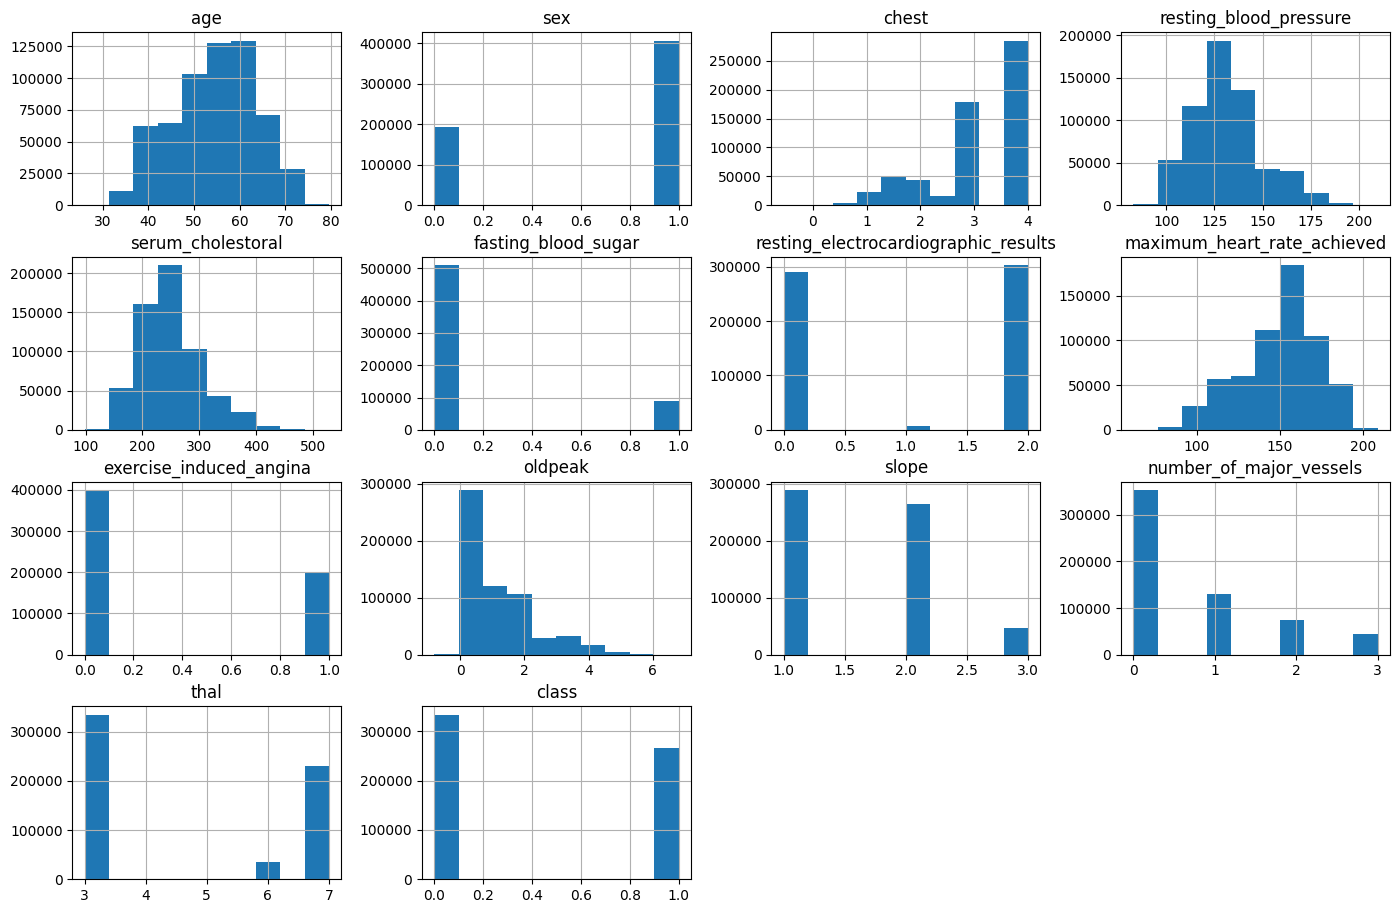

In [73]:
# Удаляем лишнюю колонку ID
train_data = train_data.drop(['ID'], axis=1)
# Удаляем дупликаты
train_data = train_data.drop_duplicates()
# Визуализируем гистограммы
train_data.hist(figsize=(17,11))

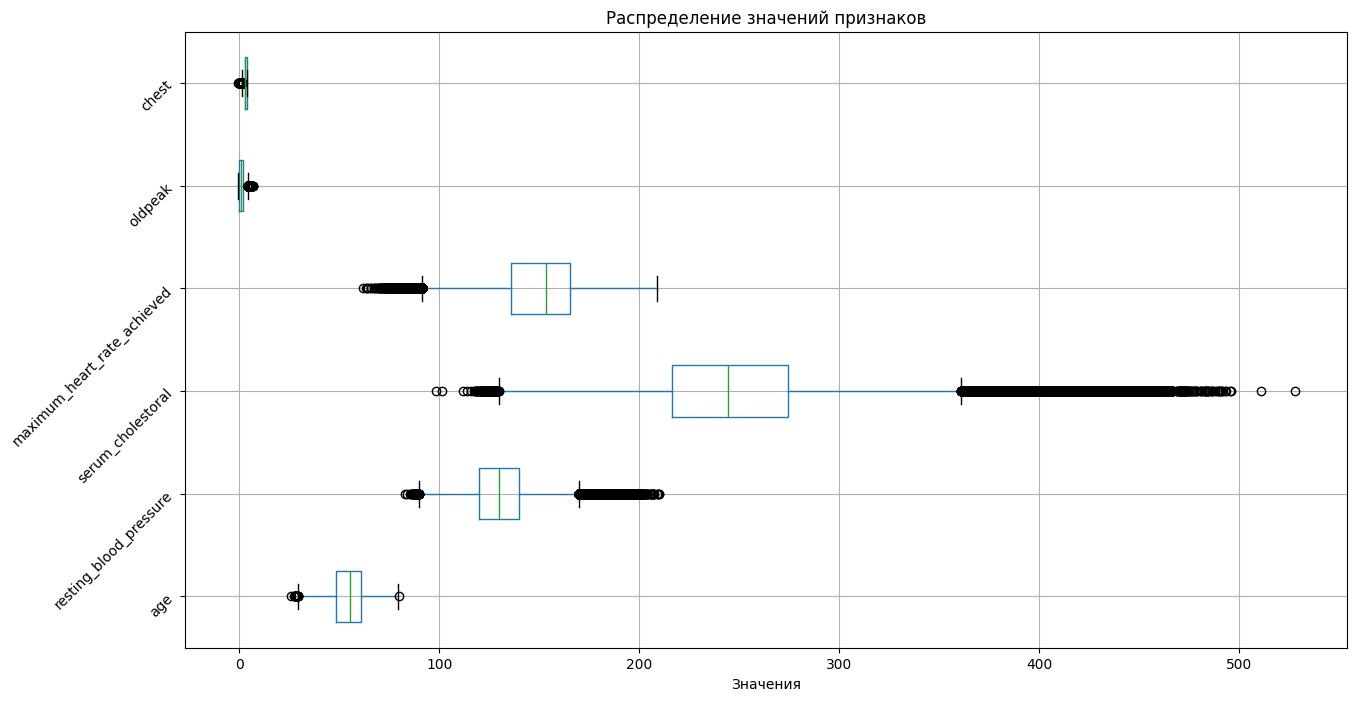

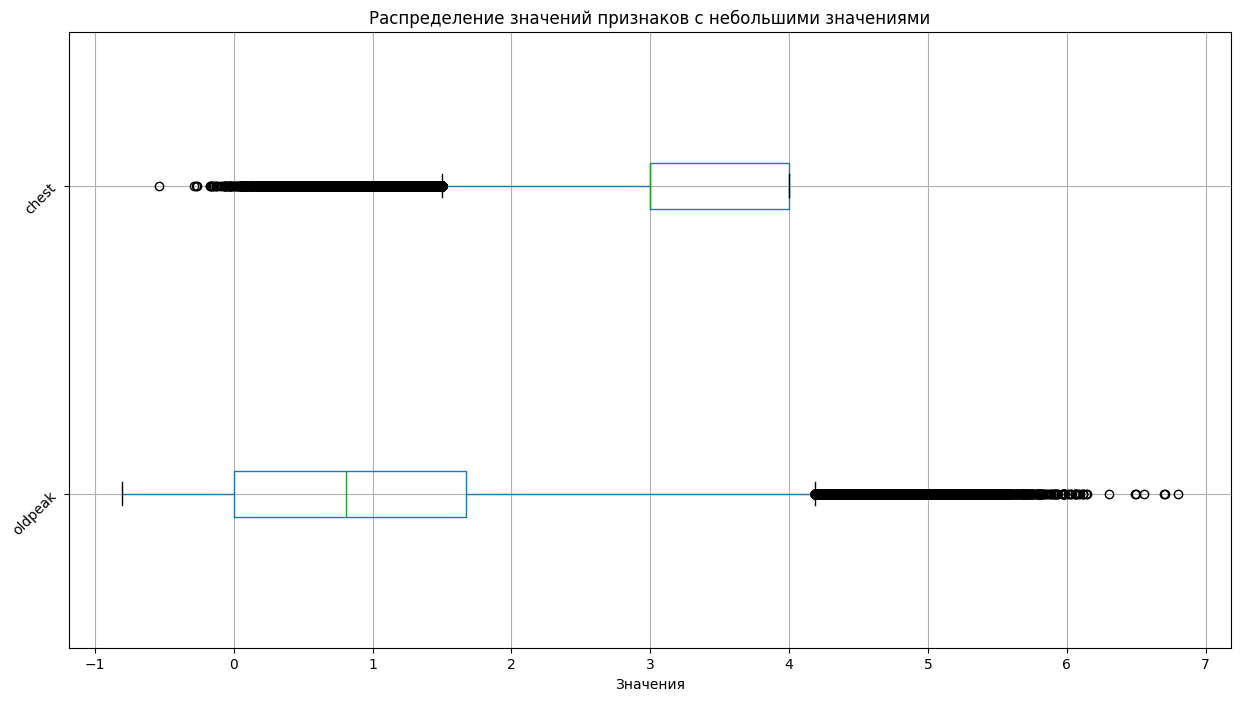

In [74]:
# Создаём список с числовыми признаками
numeric_columns = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                   'maximum_heart_rate_achieved', 'oldpeak', 'chest']
# Изображаем ящики с усами для всех числовых признаков
train_data[numeric_columns].boxplot(figsize=(15,8), vert=False)
plt.title('Распределение значений признаков')
plt.xlabel('Значения')
plt.yticks(rotation=45)
plt.show()
# На отдельном графике изобразим признаки с небольшими числовыми значениями,
# для лучшей читаемости
numeric_columns_2 = ['oldpeak', 'chest']
train_data[numeric_columns_2].boxplot(figsize=(15,8), vert=False)
plt.title('Распределение значений признаков c небольшими значениями')
plt.xlabel('Значения')
plt.yticks(rotation=45)
plt.show()

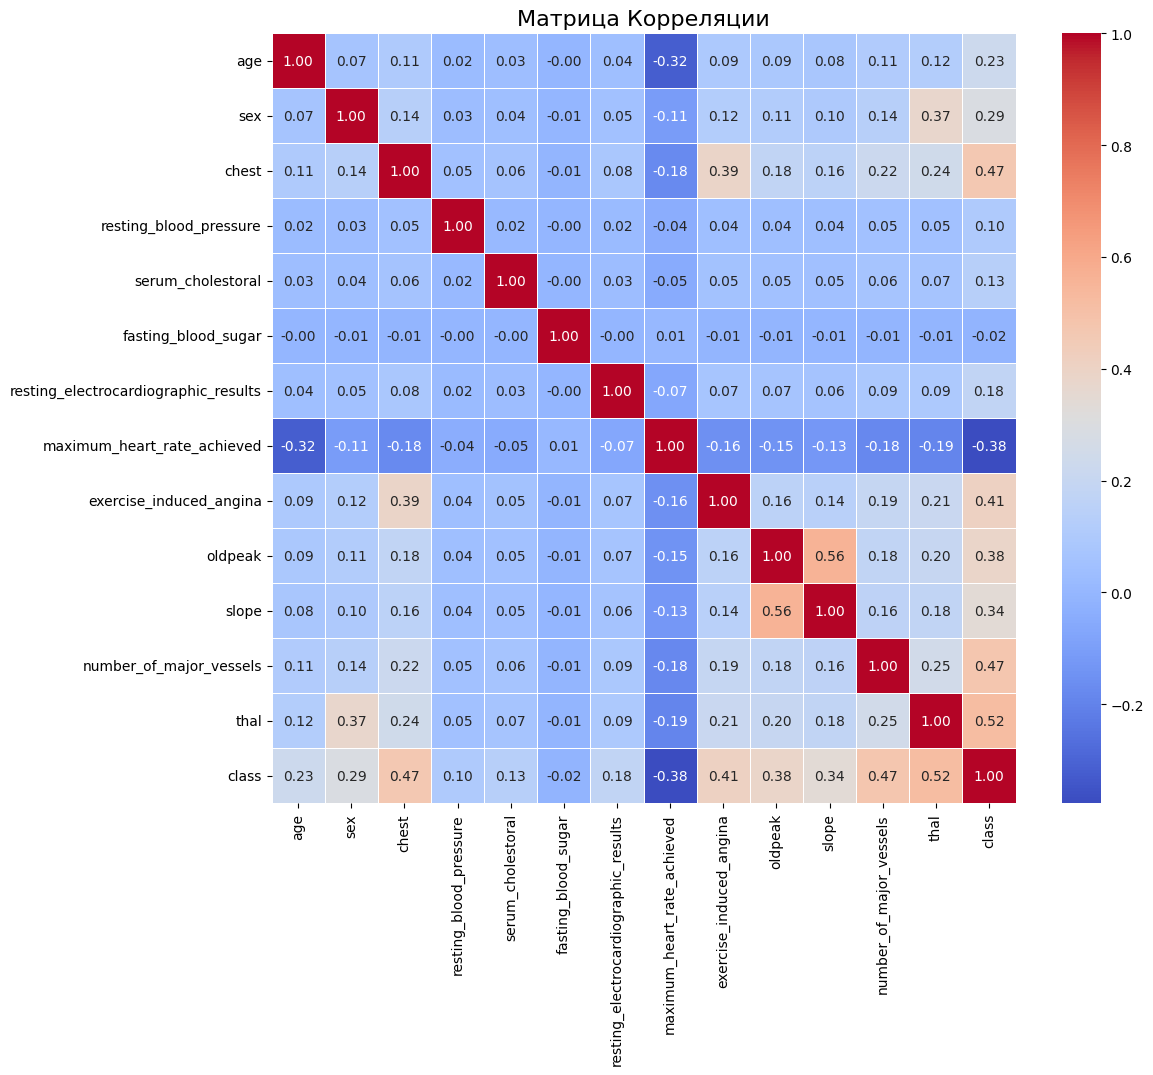

In [75]:
# Рассчитаем корреляцию признаков
correlation_matrix = train_data.corr(method='spearman')
# Построим матрицу корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    linewidths=0.5,      
)
plt.title("Матрица Корреляции", fontsize=16)
plt.show()

**Chest (боль в груди):Коэффициент корреляции: 0.47.**
Признак "боль в груди" имеет умеренную положительную корреляцию с классом. Это означает, что тип боли в груди может быть связан с целевым признаком (наличие или отсутствие заболевания сердца). Чем выше показатель боли в груди, тем более вероятно, что у пациента есть сердечное заболевание.

**Thal (результаты теста таллия):Коэффициент корреляции: 0.52.**
Признак "Thal" имеет наибольшую корреляцию с целевым признаком. Высокие значения коэффициента могут указывать на то, что тип дефекта (норма, фиксированный или обратимый дефект) сильно связан с диагнозом заболевания.

**Number_of_major_vessels (количество крупных сосудов, окрашенных с помощью флюороскопии):Коэффициент корреляции: 0.47.**
Признак "количество крупных сосудов" также показывает умеренную положительную корреляцию с классом. Это указывает на то, что большее количество поражённых сосудов связано с более высоким риском сердечного заболевания.

**Maximum_heart_rate_achieved (максимальная частота сердечных сокращений):Коэффициент корреляции: -0.38.**
Отрицательная корреляция с классом означает, что более высокая максимальная частота сердечных сокращений связана с меньшей вероятностью заболевания. Это логично, так как более здоровое сердце может достигать более высокой частоты при нагрузке.

**Oldpeak (депрессия ST-сегмента):Коэффициент корреляции: 0.38.**
Умеренная положительная корреляция указывает на то, что депрессия ST-сегмента после нагрузки связана с наличием сердечного заболевания. Чем выше показатель "oldpeak", тем выше вероятность сердечного заболевания.

**Slope (наклон пикового сегмента ST при физической нагрузке):Коэффициент корреляции: 0.34.**
Положительная корреляция с наклоном ST-сегмента означает, что изменение наклона ST может быть связано с наличием или отсутствием сердечных проблем.

**Exercise_induced_angina (стенокардия при нагрузке):Коэффициент корреляции: 0.41.**
Умеренная положительная корреляция указывает на то, что стенокардия, возникающая при физической нагрузке, также связана с сердечными заболеваниями.

In [76]:
# Загружаем данные
X_train = train_data.drop(['class'], axis=1)
y_train = train_data['class']
X_test = pd.read_csv('data\\test.csv')
X_test = X_test.drop(['ID'], axis=1)

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Разделение данных на тренировочные и валидационные выборки
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

numeric_columns = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                   'maximum_heart_rate_achieved', 'oldpeak', 'chest']
categorical_columns = ['slope', 'thal', 'resting_electrocardiographic_results', 'number_of_major_vessels']

# Стандартизация числовых данных
scaler = StandardScaler()

# Применяем стандартизацию к числовым признакам
X_train_part[numeric_columns] = scaler.fit_transform(X_train_part[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Кодирование категориальных признаков с помощью pd.get_dummies
X_train_part = pd.get_dummies(X_train_part, columns=categorical_columns, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

X_test = X_test.sort_index()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Создание и обучение модели логистической регрессии
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train_part, y_train_part)

# Предсказание и оценка точности на валидационной выборке
y_val_pred_logreg = model_logreg.predict(X_val)
val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
print(f"Точность на валидационной выборке: {val_accuracy_logreg:.2f}")

# Предсказание на тестовой выборке
y_test_pred_logreg = model_logreg.predict(X_test)

# Создание датафрейма с результатами предсказания
df_predictions_logreg = pd.DataFrame({
    'ID': range(600000, 600000 + len(y_test_pred_logreg)),
    'class': y_test_pred_logreg
})

Точность на валидационной выборке: 0.88


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# # Определение модели
# model_rf = RandomForestClassifier(random_state=42)

# # Настройка сетки гиперпараметров
# param_grid = {
#     'n_estimators': [100, 200, 300], 
#     'max_depth': [10, 20, 30],         
#     'min_samples_split': [2, 5, 10],   
#     'min_samples_leaf': [1, 2, 4]      
# }

# # Создание объекта GridSearchCV
# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, verbose=1, scoring='accuracy', n_jobs = -1)

# # Обучение GridSearchCV
# grid_search.fit(X_train_part, y_train_part)
# print("Лучшие параметры:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# Определение модели
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split= 5, min_samples_leaf=2, random_state=42)

# Обучение модели на тренировочных данных
model_rf.fit(X_train_part, y_train_part)

# Предсказание на валидационных данных
y_val_pred_rf = model_rf.predict(X_val)

# Расчет точности на валидационных данных
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print("Точность на валидационной выборке:", accuracy_val_rf)

# Предсказание на тестовой выборке
y_test_pred_rf = model_rf.predict(X_test)

# Создание датафрейма с результатами предсказания на тестовой выборке
df_predictions_rf = pd.DataFrame({
    'ID': range(600000, 600000 + len(y_test_pred_rf)),
    'class': y_test_pred_rf
})


Точность на валидационной выборке: 0.8927833333333334


Epoch 1/10


C:\Users\ARTEM\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8875 - loss: 0.2692 - val_accuracy: 0.8952 - val_loss: 0.2522
Epoch 2/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8974 - loss: 0.2487 - val_accuracy: 0.8987 - val_loss: 0.2478
Epoch 3/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8990 - loss: 0.2458 - val_accuracy: 0.8990 - val_loss: 0.2467
Epoch 4/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8999 - loss: 0.2435 - val_accuracy: 0.8993 - val_loss: 0.2445
Epoch 5/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9015 - loss: 0.2409 - val_accuracy: 0.8991 - val_loss: 0.2447
Epoch 6/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9013 - loss: 0.2412 - val_accuracy: 0.9004 - val_loss: 0.2429
Epoch 7/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9013 - loss: 0.2400 - val_accuracy: 0.9004 - val_loss: 0.2428
Epoch 8/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9013 - lo

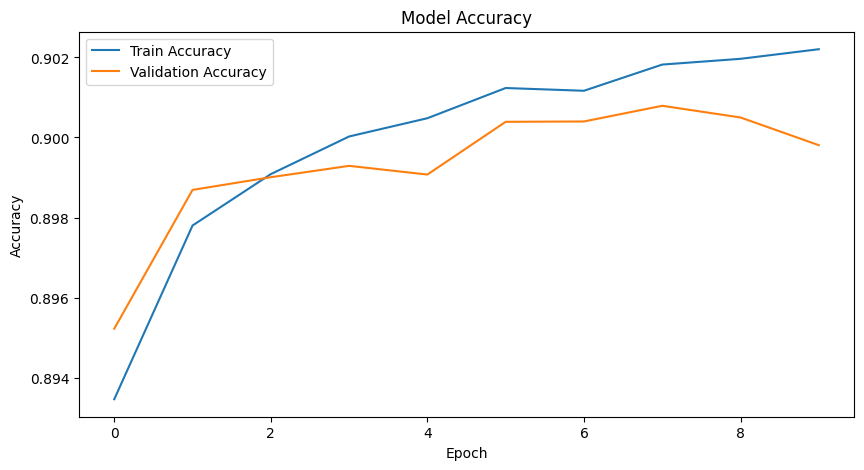

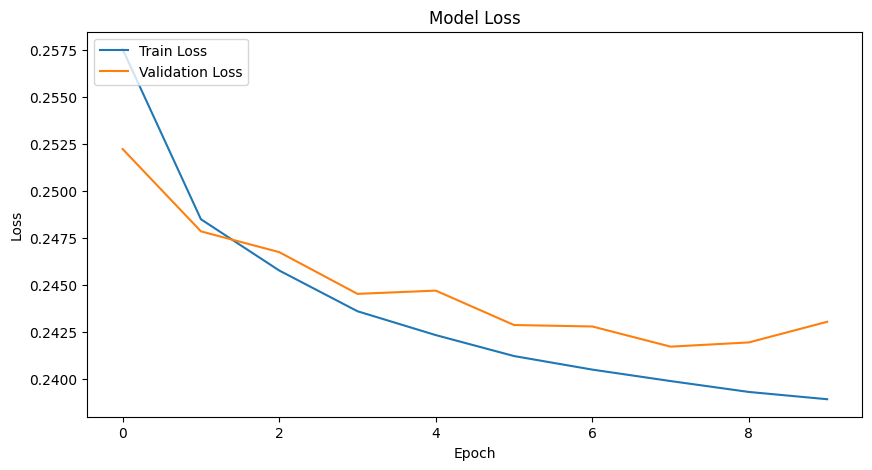

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Функция для создания модели
def create_dnn_model(input_shape):
    model = Sequential([
        Dense(64, input_shape=(input_shape,), activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Бинарная классификация
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Создание модели
input_shape = X_train_part.shape[1]
model_dnn = create_dnn_model(input_shape)

# Обучение модели и сохранение истории
history = model_dnn.fit(X_train_part, y_train_part, validation_data=(X_val, y_val), epochs=8, batch_size=32, verbose=1)

# Построение графиков точности и потерь
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Сохранение всей модели, включая архитектуру
model_dnn.save('dnn_model_complete.h5')


In [86]:
# Загрузка модели
model_dnn = load_model('dnn_model_complete.h5')

# Выполнение предсказаний
y_test_pred_dnn = model_dnn.predict(X_test)
y_test_pred_dnn = (y_test_pred_dnn > 0.5).astype(int)

# Преобразование предсказаний в одномерный массив, выбирая первый столбец
y_test_pred_dnn = y_test_pred_dnn[:, 0]

# Создание датафрейма с результатами предсказания
df_predictions_dnn = pd.DataFrame({
    'ID': range(600000, 600000 + len(y_test_pred_dnn)),
    'class': y_test_pred_dnn
})

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
